In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt

In [2]:
data = pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.duplicated().sum()

220

In [7]:
data = data.drop_duplicates()

In [8]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'] , dayfirst=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  object        
 6   Arrival_Time     10462 non-null  object        
 7   Duration         10462 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Additional_Info  10462 non-null  object        
 10  Price            10462 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 980.8+ KB


In [11]:
data.shape

(10462, 11)

In [12]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
data['Day_of_journey'] = data['Date_of_Journey'].dt.day
data['Month_of_journey'] = data['Date_of_Journey'].dt.month

In [14]:
data = data.drop(['Date_of_Journey'] , axis=1)

In [15]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
data['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

## EDA

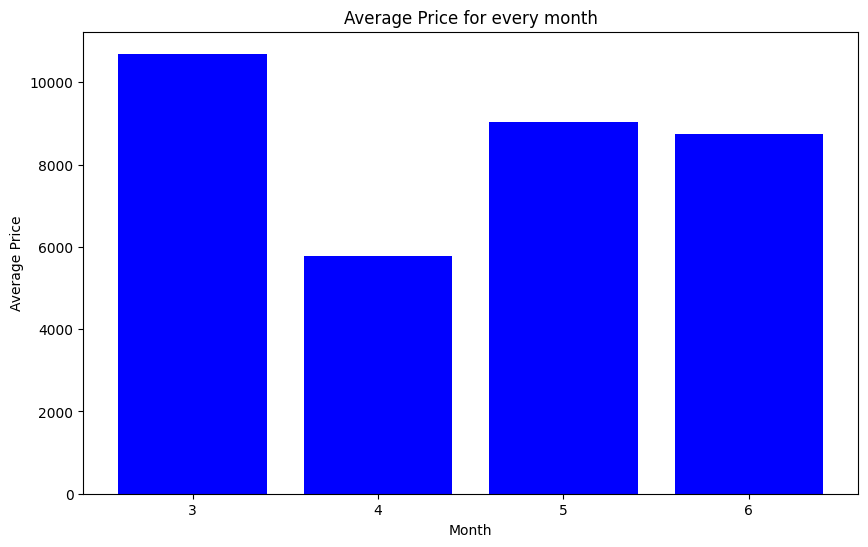

In [17]:
avg_price = data.groupby('Month_of_journey')['Price'].mean().reset_index()
    
plt.figure(figsize=(10, 6))
plt.bar(avg_price['Month_of_journey'], avg_price['Price'], color = 'blue')
plt.title(f'Average Price for every month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(3,7))
plt.show()

In [59]:
def price_by_month(airline_name):
    airline_data = data[data['Airline'] == airline_name]

    monthly_avg_price = airline_data.groupby('Month_of_journey')['Price'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.bar(monthly_avg_price['Month_of_journey'], monthly_avg_price['Price'], color = 'skyblue')
    plt.title(f'Average Price by Month for {airline_name}')
    plt.xlabel('Month')
    plt.ylabel('Average Price')
    plt.xticks(range(3,7))  # For displaying months on X-axis
    plt.show()
    

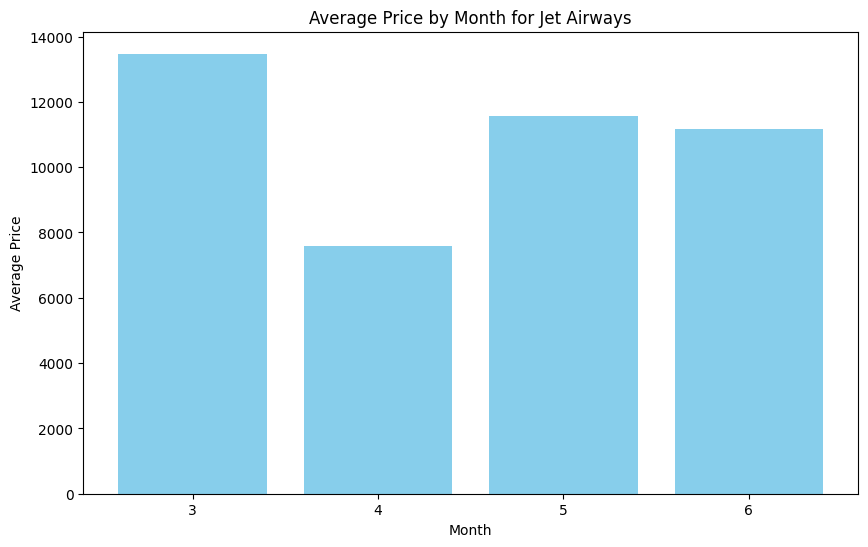

In [60]:
price_by_month('Jet Airways')

In [61]:
def price_by_days(airline_name,month):
    
    airline_data = data[(data['Airline'] == airline_name) & (data['Month_of_journey'] == month)]

    daily_avg_price = airline_data.groupby('Day_of_journey')['Price'].max().reset_index()

    plt.figure(figsize=(10, 6))
    plt.bar(daily_avg_price['Day_of_journey'], daily_avg_price['Price'], color='skyblue')
    plt.title(f'Average Price by Day for {airline_name} in {month}rd Month ', fontsize=14)
    plt.xlabel('Day of the Month', fontsize=12)
    plt.ylabel('Average Price', fontsize=12)
    plt.xticks(range(1, daily_avg_price['Day_of_journey'].max() + 1))  
    plt.show()

   

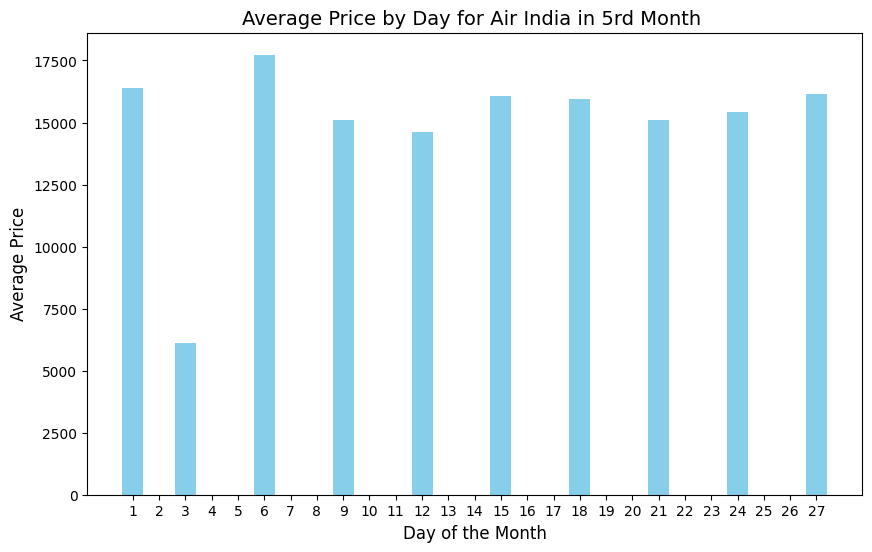

In [62]:
price_by_days('Air India',5)

In [63]:
# Filter the data for "IndiGo"
indigo_data = data[data['Airline'] == 'IndiGo']

# Group by month and day, and count the number of flights
flight_counts = indigo_data.groupby(['Month_of_journey', 'Day_of_journey']).size().reset_index(name='Flight_Count')
print(flight_counts)

    Month_of_journey  Day_of_journey  Flight_Count
0                  3               1            39
1                  3               3            95
2                  3               6            59
3                  3               9            81
4                  3              12            10
5                  3              15            43
6                  3              18            27
7                  3              21            83
8                  3              24            57
9                  3              27            63
10                 4               1            35
11                 4               3            35
12                 4               6            33
13                 4               9            34
14                 4              12            23
15                 4              15            34
16                 4              18            24
17                 4              21            26
18                 4           

In [64]:
def flight_counts_by_day(airline_name):
    airline_data = data[data['Airline'] == airline_name]
    
    flight_counts = airline_data.groupby(['Month_of_journey', 'Day_of_journey']).size().reset_index(name='Flight_Count')
    
    plt.figure(figsize=(12, 8))
    for month in flight_counts['Month_of_journey'].unique():
        monthly_data = flight_counts[flight_counts['Month_of_journey'] == month]
        plt.plot(monthly_data['Day_of_journey'], monthly_data['Flight_Count'], label=f'Month {month}')

    plt.title(f'Number of Flights per Day for {airline_name} Across All Months', fontsize=16)
    plt.xlabel('Day of the Month', fontsize=14)
    plt.ylabel('Number of Flights', fontsize=14)
    plt.xticks(range(1, 32))  # Assuming maximum 31 days in a month
    plt.legend(title='Month')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


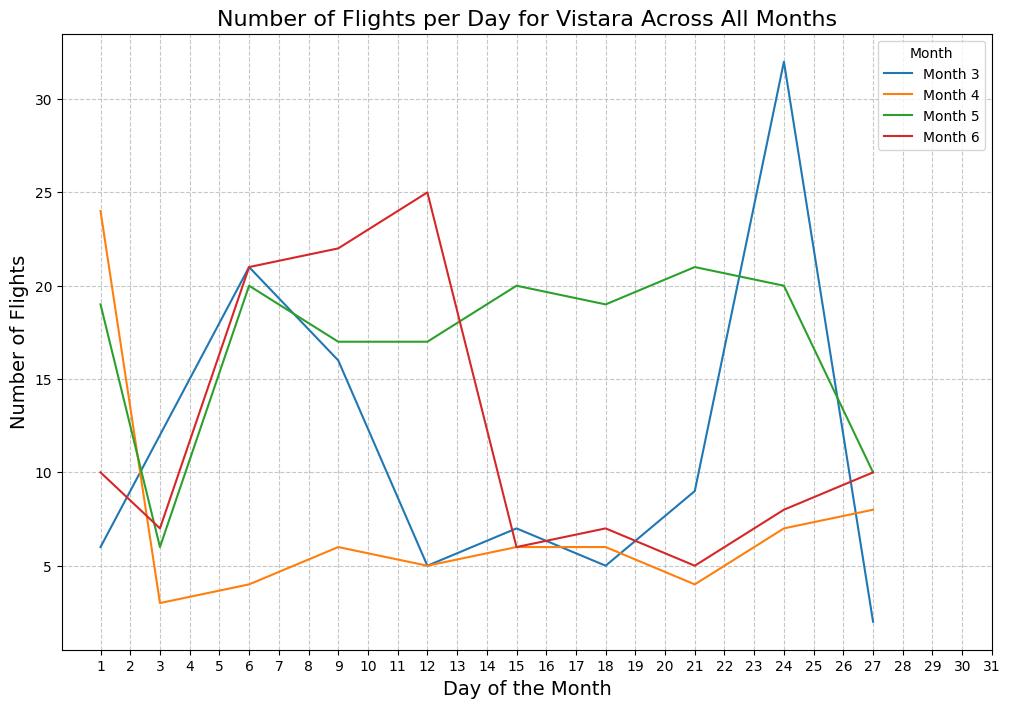

In [65]:
flight_counts_by_day('Vistara')

In [66]:
def flight_counts_by_day_and_source(airline_name, month):

    airline_month_data = data[(data['Airline'] == airline_name) & (data['Month_of_journey'] == month)]
    
    flight_counts = airline_month_data.groupby(['Day_of_journey', 'Source']).size().reset_index(name='Flight_Count')
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Day_of_journey', y='Flight_Count', hue='Source', data=flight_counts, palette='tab20')
    
    plt.title(f'Number of Flights from which Source  for {airline_name} in Month {month}', fontsize=16)
    plt.xlabel('Day of the Month', fontsize=14)
    plt.ylabel('Number of Flights', fontsize=14)
    plt.legend(title='Source')
    plt.show()


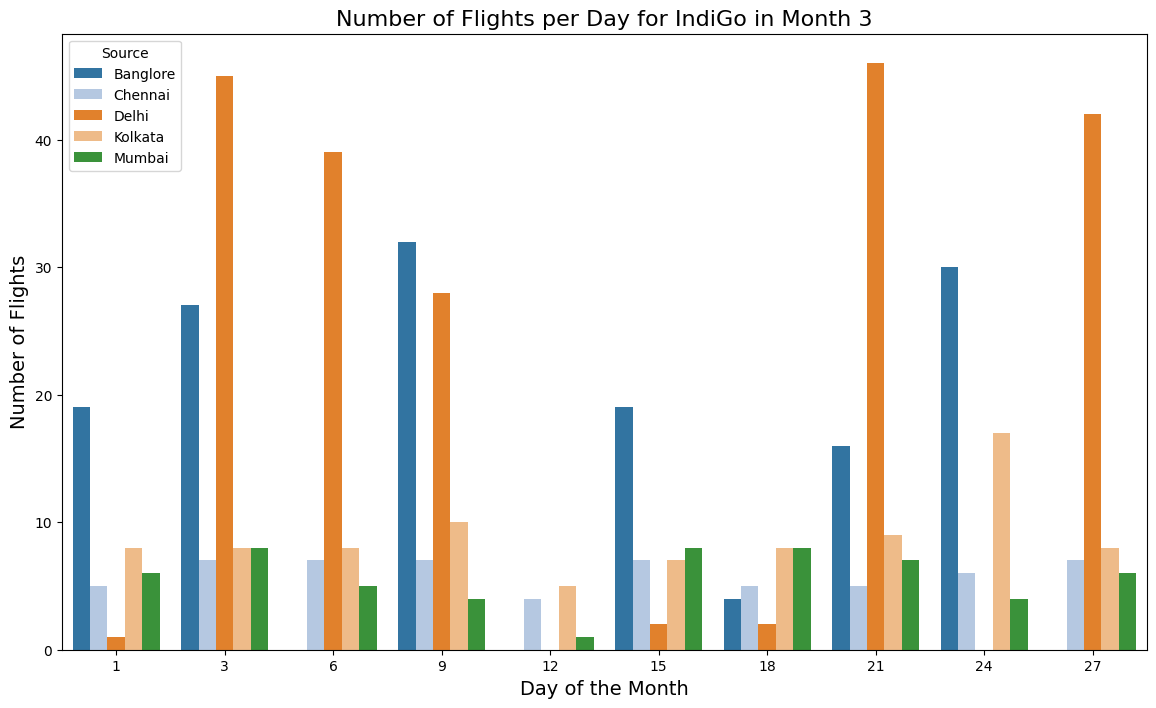

In [67]:
flight_counts_by_day_and_source('IndiGo' , 3)

In [68]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [69]:
stop_mapping = { '1 stop' : 1 , 'non-stop' : 0 , '2 stops' : 2 , '3 stops' : 3 , '4 stops' : 4}
data['Total_Stops'] = data['Total_Stops'].map(stop_mapping)

In [70]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3


In [73]:
# Group by 'Airline' and 'Total_Stops' to get the count of flights
stops_count = data.groupby(['Airline', 'Total_Stops']).size().reset_index(name='Stops_count')

# Group by 'Airline' and 'Total_Stops' to get the average price
avg_price = data.groupby(['Airline', 'Total_Stops'])['Price'].mean().round(2).reset_index(name='Avg_Price')

# Merge the count and average price dataframes
result = pd.merge(stops_count, avg_price, on=['Airline', 'Total_Stops'])

print(result)

                              Airline  Total_Stops  Stops_count  Avg_Price
0                            Air Asia            0          181    4492.33
1                            Air Asia            1          129    7078.33
2                            Air Asia            2            9    6341.89
3                           Air India            0          416    5600.55
4                           Air India            1          540    9041.51
5                           Air India            2          702   12146.86
6                           Air India            3           35   12339.06
7                           Air India            4            1   17686.00
8                               GoAir            0           92    4726.17
9                               GoAir            1          102    6884.68
10                             IndiGo            0         1231    4714.87
11                             IndiGo            1          793    7104.72
12                       

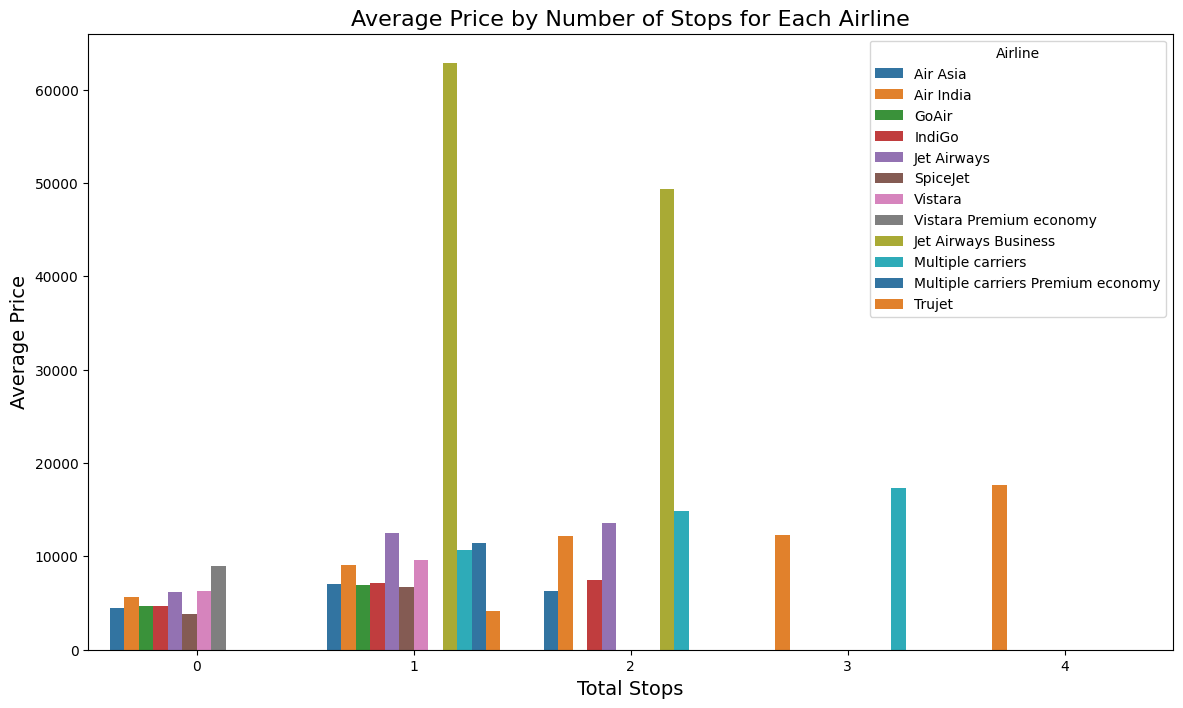

In [74]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Total_Stops', y='Avg_Price', hue='Airline', data=result, palette='tab10')
plt.title('Average Price by Number of Stops for Each Airline', fontsize=16)
plt.xlabel('Total Stops', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.legend(title='Airline')
plt.show()

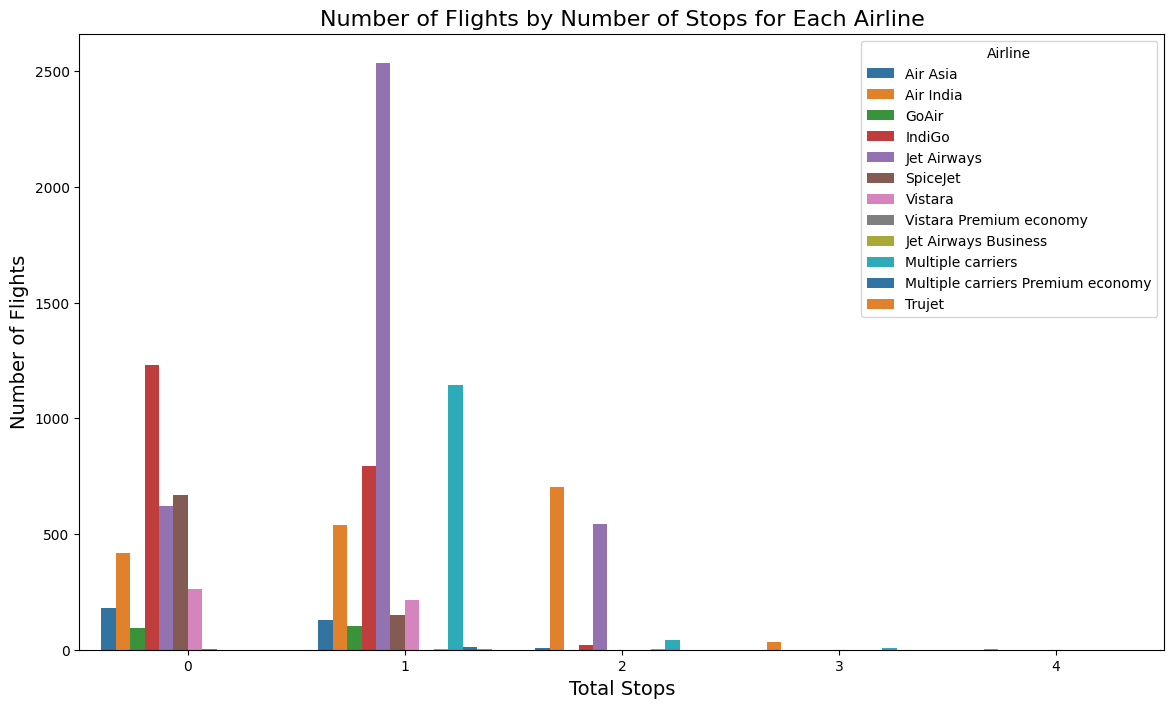

In [75]:
# Bar plot for stops count with respect to stops for each airline
plt.figure(figsize=(14, 8))
sns.barplot(x='Total_Stops', y='Stops_count', hue='Airline', data=result, palette='tab10')
plt.title('Number of Flights by Number of Stops for Each Airline', fontsize=16)
plt.xlabel('Total Stops', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.legend(title='Airline')
plt.show()

In [76]:
data['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [77]:
data['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

## AVG Price Between any Source and Destination of Every Airline 

In [78]:
route_counts = data.groupby(['Airline','Source', 'Destination'])['Price'].mean().reset_index(name='AVG_PRICE')
route_counts

,Airline,Source,Destination,AVG_PRICE
0,Air Asia,Banglore,Delhi,4265.577465
1,Air Asia,Banglore,New Delhi,5791.944444
2,Air Asia,Delhi,Cochin,7804.175000
3,Air Asia,Kolkata,Banglore,5012.320000
4,Air India,Banglore,Delhi,6045.166667
5,Air India,Banglore,New Delhi,11024.679426
6,Air India,Chennai,Kolkata,5895.640000
7,Air India,Delhi,Cochin,9960.348506
8,Air India,Kolkata,Banglore,10296.273453
9,Air India,Mumbai,Hyderabad,6260.051471


## Feature Engineering

In [79]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3


<h4>Feature Engineering on 'Duration'</h4> 

In [80]:
# Conversion of Duration column from hr & Minutes format to Minutes
data['Duration']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# convert this column into a numeric datatypes
data['Duration']=pd.to_numeric(data['Duration'])

<h4>Feature Engineering on 'Dep_time'</h4>

In [81]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], format='%H:%M')

# Extracting Hours from Dep_Time column
data['Dep_Hour']=pd.to_datetime(data['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
data['Dep_Min']=pd.to_datetime(data['Dep_Time']).dt.minute

# Dropping Dep_Time column
data = data.drop("Dep_Time",axis=1)

<h4>Feature Engineering on 'Arrival_time'</h4>

In [82]:
#Extracting the time part from Arrival_time column
data['Time_Part'] = data['Arrival_Time'].apply(lambda x: x.split(' ')[0])


data['Time_Part'] = pd.to_datetime(data['Time_Part'], format='%H:%M')

# Extracting Hours from Arrival_Time column
data['Arrival_Hour']=pd.to_datetime(data['Time_Part']).dt.hour

# Extracting Minutes from Arrival_Time column
data['Arrival_Min']=pd.to_datetime(data['Time_Part']).dt.minute

# Dropping Arrival_Time column
data = data.drop("Arrival_Time",axis=1)

In [83]:
data.drop(['Time_Part'],axis=1,inplace=True)

In [84]:
print('No of Rows:',data.shape[0])
print('No of Columns:',data.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
data.head()

No of Rows: 10462
No of Columns: 14


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Source            10462 non-null  object
 2   Destination       10462 non-null  object
 3   Route             10462 non-null  object
 4   Duration          10462 non-null  int64 
 5   Total_Stops       10462 non-null  int64 
 6   Additional_Info   10462 non-null  object
 7   Price             10462 non-null  int64 
 8   Day_of_journey    10462 non-null  int32 
 9   Month_of_journey  10462 non-null  int32 
 10  Dep_Hour          10462 non-null  int32 
 11  Dep_Min           10462 non-null  int32 
 12  Arrival_Hour      10462 non-null  int32 
 13  Arrival_Min       10462 non-null  int32 
dtypes: int32(6), int64(3), object(5)
memory usage: 980.8+ KB


In [86]:
# Spliting data into categorical and Numerical Variable
Numerical = ['Duration', 'Total_Stops', 'Price', 'Day_of_journey', 'Month_of_journey', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']

Categorical = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']

In [87]:
print(data['Source'].value_counts())
print('*'*50)
print(data['Destination'].value_counts())

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64
**************************************************
Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64


In [88]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

## Observation :
<ul>
    <li>"New Delhi" is mention as "Delhi". We we gone regulated it.</li>
    <li>No info is mention as 'No Info' few times.</li>
</ul>

In [89]:
# Replacing "New Delhi" as "Delhi" in Destination column
data["Destination"] = data["Destination"].replace("New Delhi","Delhi")

# In the column "Additional Info", "No Info" and "No info" are same so replacing it by "No Info
data['Additional_Info'] = data['Additional_Info'].replace("No info", "No Info")

In [90]:
data.duplicated().sum()

2

In [91]:
data = data.drop_duplicates()

In [92]:
data.shape

(10460, 14)

In [93]:
data.isna().sum()

Airline             0
Source              0
Destination         0
Route               0
Duration            0
Total_Stops         0
Additional_Info     0
Price               0
Day_of_journey      0
Month_of_journey    0
Dep_Hour            0
Dep_Min             0
Arrival_Hour        0
Arrival_Min         0
dtype: int64

In [94]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,10460.0,629.869503,500.706538,5.0,170.0,505.0,910.00,2860.0
Total_Stops,10460.0,0.802486,0.660579,0.0,0.0,1.0,1.00,4.0
Price,10460.0,9027.360421,4625.057376,1759.0,5224.0,8266.0,12346.25,79512.0
Day_of_journey,10460.0,13.463193,8.467058,1.0,6.0,12.0,21.00,27.0
Month_of_journey,10460.0,4.701816,1.163676,3.0,3.0,5.0,6.00,6.0
Dep_Hour,10460.0,12.476673,5.726244,0.0,8.0,11.0,18.00,23.0
Dep_Min,10460.0,24.406310,18.816989,0.0,5.0,25.0,40.00,55.0
Arrival_Hour,10460.0,13.390057,6.854048,0.0,8.0,14.0,19.00,23.0
Arrival_Min,10460.0,24.723231,16.570287,0.0,10.0,25.0,35.00,55.0


In [95]:
data[Categorical].describe().T

,count,unique,top,freq
Airline,10460,12,Jet Airways,3700
Source,10460,5,Delhi,4345
Destination,10460,5,Cochin,4345
Route,10460,128,DEL → BOM → COK,2376
Additional_Info,10460,9,No Info,8183


## Observation :
<ul>
    <li>The Minimum flight ticket price is Rs.1759 and Maximum flight ticket price is Rs.79512.</li>
    <li>The ( mean > median ) for Price,Journey_Day,Duration and Dep_Hour, which mean right skew data.</li>
    <li>The ( mean < median ) for Dep_Min,Arrival_Hour and Arrival_Min which mean left skew data.</li>
    <li>Presense of outliers in Duration & Price columns as we see huge difference in 75% and max.</li>
    <li>High value of std. deviation indicating spread of data.</li>
    <li>There are 12 airline in dataset with maximum flight run by Jet Airways.</li>
    <li>The data of 128 route in dataset and we find maximum flight on route DEL → BOM → COK.</li>
    <li>Long route flight have atleast one 1 stop.</li>
</ul>

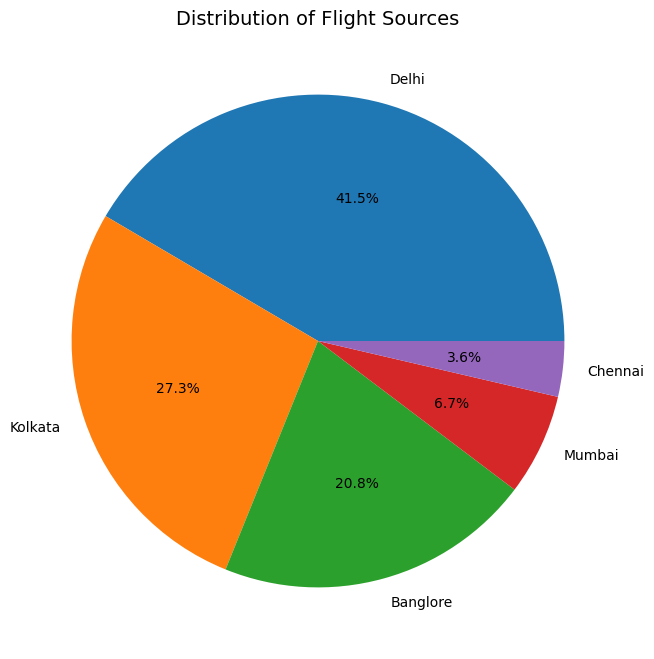

In [96]:
source_data = data['Source'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(source_data, labels=source_data.index, autopct='%1.1f%%')
plt.title('Distribution of Flight Sources', fontsize=14)
plt.show()

## Observation :
<li>Maximum flight depart from Delhi followed by Kolkata.</li>

Text(0, 0.5, 'Price')

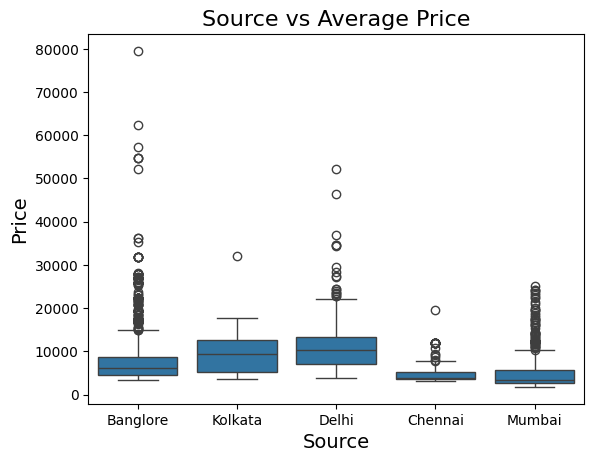

In [97]:
#box plot for Source vs Price
sns.boxplot(x='Source', y='Price', data=data)
plt.title('Source vs Average Price', fontsize=16)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Price', fontsize=14)


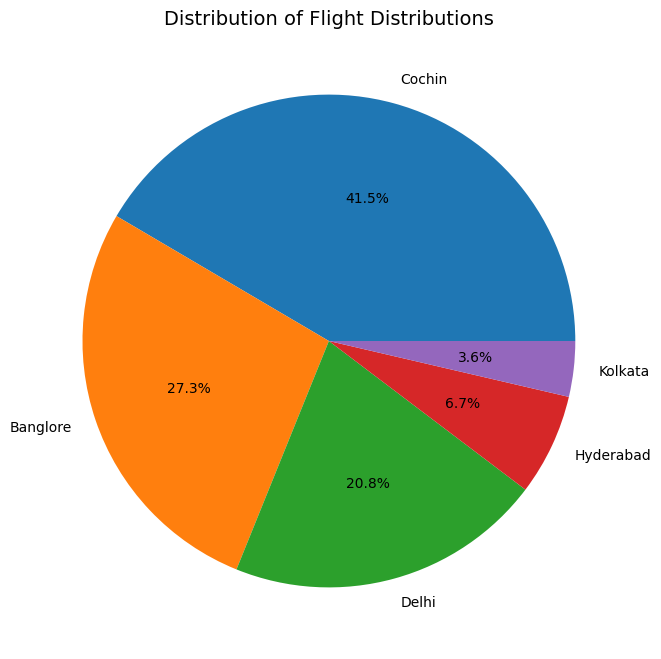

In [98]:
Dest_data = data['Destination'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(Dest_data, labels=Dest_data.index, autopct='%1.1f%%')
plt.title('Distribution of Flight Distributions', fontsize=14)
plt.show()

## Observation :
<li>Maximum Flight lands into cochin followed by Banglore.</li>

Text(0, 0.5, 'Price')

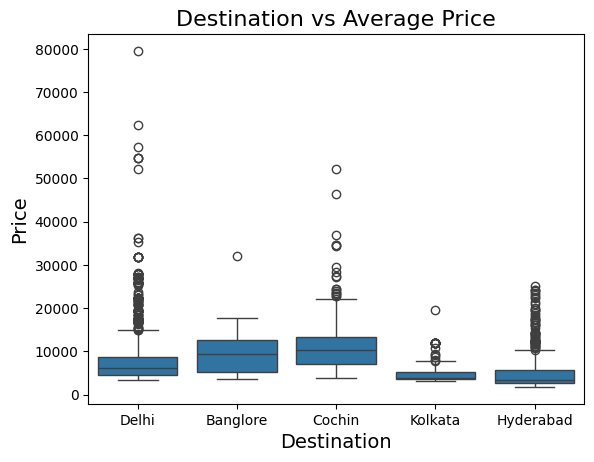

In [99]:
#box plot for Source vs Price
sns.boxplot(x='Destination', y='Price', data=data)
plt.title('Destination vs Average Price', fontsize=16)
plt.xlabel('Destination', fontsize=14)
plt.ylabel('Price', fontsize=14)


## Label Encoding for Categorical Data

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    data[i] = le.fit_transform(data[i])

In [101]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,170,0,6,3897,24,3,22,20,1,10
1,1,3,0,84,445,2,6,7662,1,5,5,50,13,15
2,4,2,1,118,1140,2,6,13882,9,6,9,25,4,25
3,3,3,0,91,325,1,6,6218,12,5,18,5,23,30
4,3,0,2,29,285,1,6,13302,1,3,16,50,21,35


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10460 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10460 non-null  int32
 1   Source            10460 non-null  int32
 2   Destination       10460 non-null  int32
 3   Route             10460 non-null  int32
 4   Duration          10460 non-null  int64
 5   Total_Stops       10460 non-null  int64
 6   Additional_Info   10460 non-null  int32
 7   Price             10460 non-null  int64
 8   Day_of_journey    10460 non-null  int32
 9   Month_of_journey  10460 non-null  int32
 10  Dep_Hour          10460 non-null  int32
 11  Dep_Min           10460 non-null  int32
 12  Arrival_Hour      10460 non-null  int32
 13  Arrival_Min       10460 non-null  int32
dtypes: int32(11), int64(3)
memory usage: 776.3 KB


## Outlier Detection

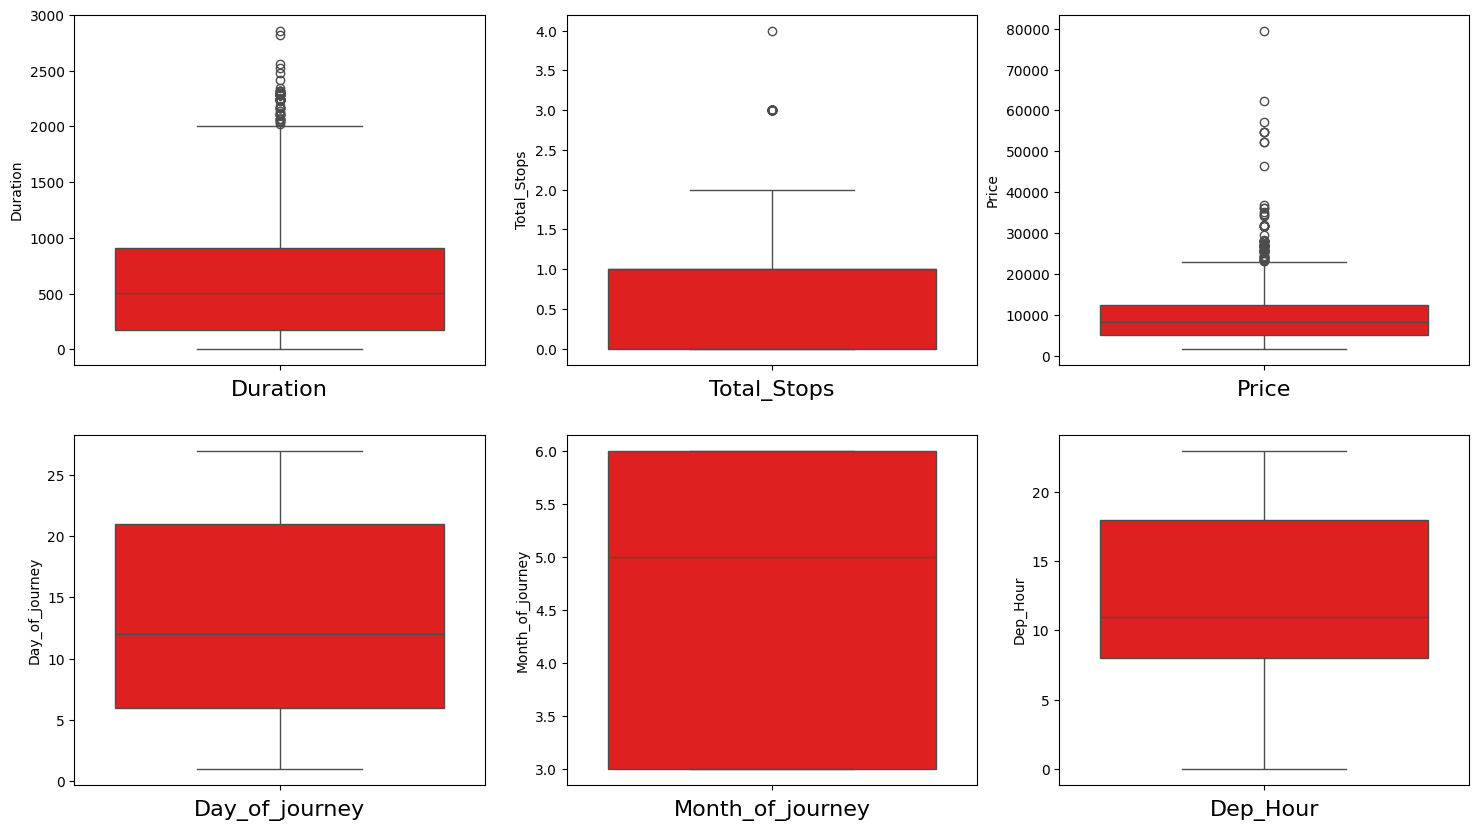

In [103]:
plt.figure(figsize=(18,10))
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(data[column],color='r')
        plt.xlabel(column,fontsize=16)
    plotnumber+=1
plt.show()

## Removal Using Zscore Method

In [104]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
newdata = data[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", data.shape)
print ("Shape of the dataframe after removing outliers: ", newdata.shape)
print ("Percentage of data loss post outlier removal: ", (data.shape[0]-newdata.shape[0])/data.shape[0]*100)

data=newdata.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (10460, 14)
Shape of the dataframe after removing outliers:  (10256, 14)
Percentage of data loss post outlier removal:  1.9502868068833654


## Checking Skew for Continuous Data that is Duration

In [105]:
data.skew() # i am ignoring the skewness for others as there values are either discrete or categorical

Airline             0.722682
Source             -0.435507
Destination         0.851034
Route              -0.487899
Duration            0.821698
Total_Stops         0.233264
Additional_Info    -0.722013
Price               0.444590
Day_of_journey      0.113066
Month_of_journey   -0.410611
Dep_Hour            0.097027
Dep_Min             0.177800
Arrival_Hour       -0.372715
Arrival_Min         0.106683
dtype: float64

In [106]:
data['Duration'] = np.log1p(data['Duration'])

In [107]:
data['Duration'].skew()

-0.14569614272921297

In [108]:
correlation = data.corr()
correlation

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.015395,0.070872,0.028024,-0.112417,-0.182719,0.101433,-0.035733,0.023434,0.019971,-0.041451,-0.063796,0.001967,-0.075487
Source,-0.015395,1.000000,-0.430281,0.390233,0.128490,0.208562,-0.035629,0.077373,-0.014965,0.166457,0.061397,-0.049862,0.027909,0.021400
Destination,0.070872,-0.430281,1.000000,-0.218677,-0.520850,-0.443373,0.132775,-0.335780,0.014878,-0.140911,-0.091169,0.094401,-0.061954,0.006102
Route,0.028024,0.390233,-0.218677,1.000000,0.370883,0.463460,-0.004245,0.246605,0.060278,0.223421,-0.072559,-0.062817,0.021407,-0.179606
Duration,-0.112417,0.128490,-0.520850,0.370883,1.000000,0.827604,-0.279303,0.672624,-0.022703,0.041347,-0.002081,-0.038861,0.068040,-0.128068
Total_Stops,-0.182719,0.208562,-0.443373,0.463460,0.827604,1.000000,-0.184042,0.667925,-0.008442,0.061783,-0.048392,-0.005899,0.043322,-0.111209
Additional_Info,0.101433,-0.035629,0.132775,-0.004245,-0.279303,-0.184042,1.000000,-0.157207,-0.013326,-0.054414,-0.062845,0.027982,-0.025955,0.044364
Price,-0.035733,0.077373,-0.335780,0.246605,0.672624,0.667925,-0.157207,1.000000,-0.118881,-0.051217,0.013058,-0.056664,0.041845,-0.100927
Day_of_journey,0.023434,-0.014965,0.014878,0.060278,-0.022703,-0.008442,-0.013326,-0.118881,1.000000,-0.061471,-0.005524,0.000816,-0.002608,-0.015071
Month_of_journey,0.019971,0.166457,-0.140911,0.223421,0.041347,0.061783,-0.054414,-0.051217,-0.061471,1.000000,0.036925,-0.056080,0.004203,-0.099063


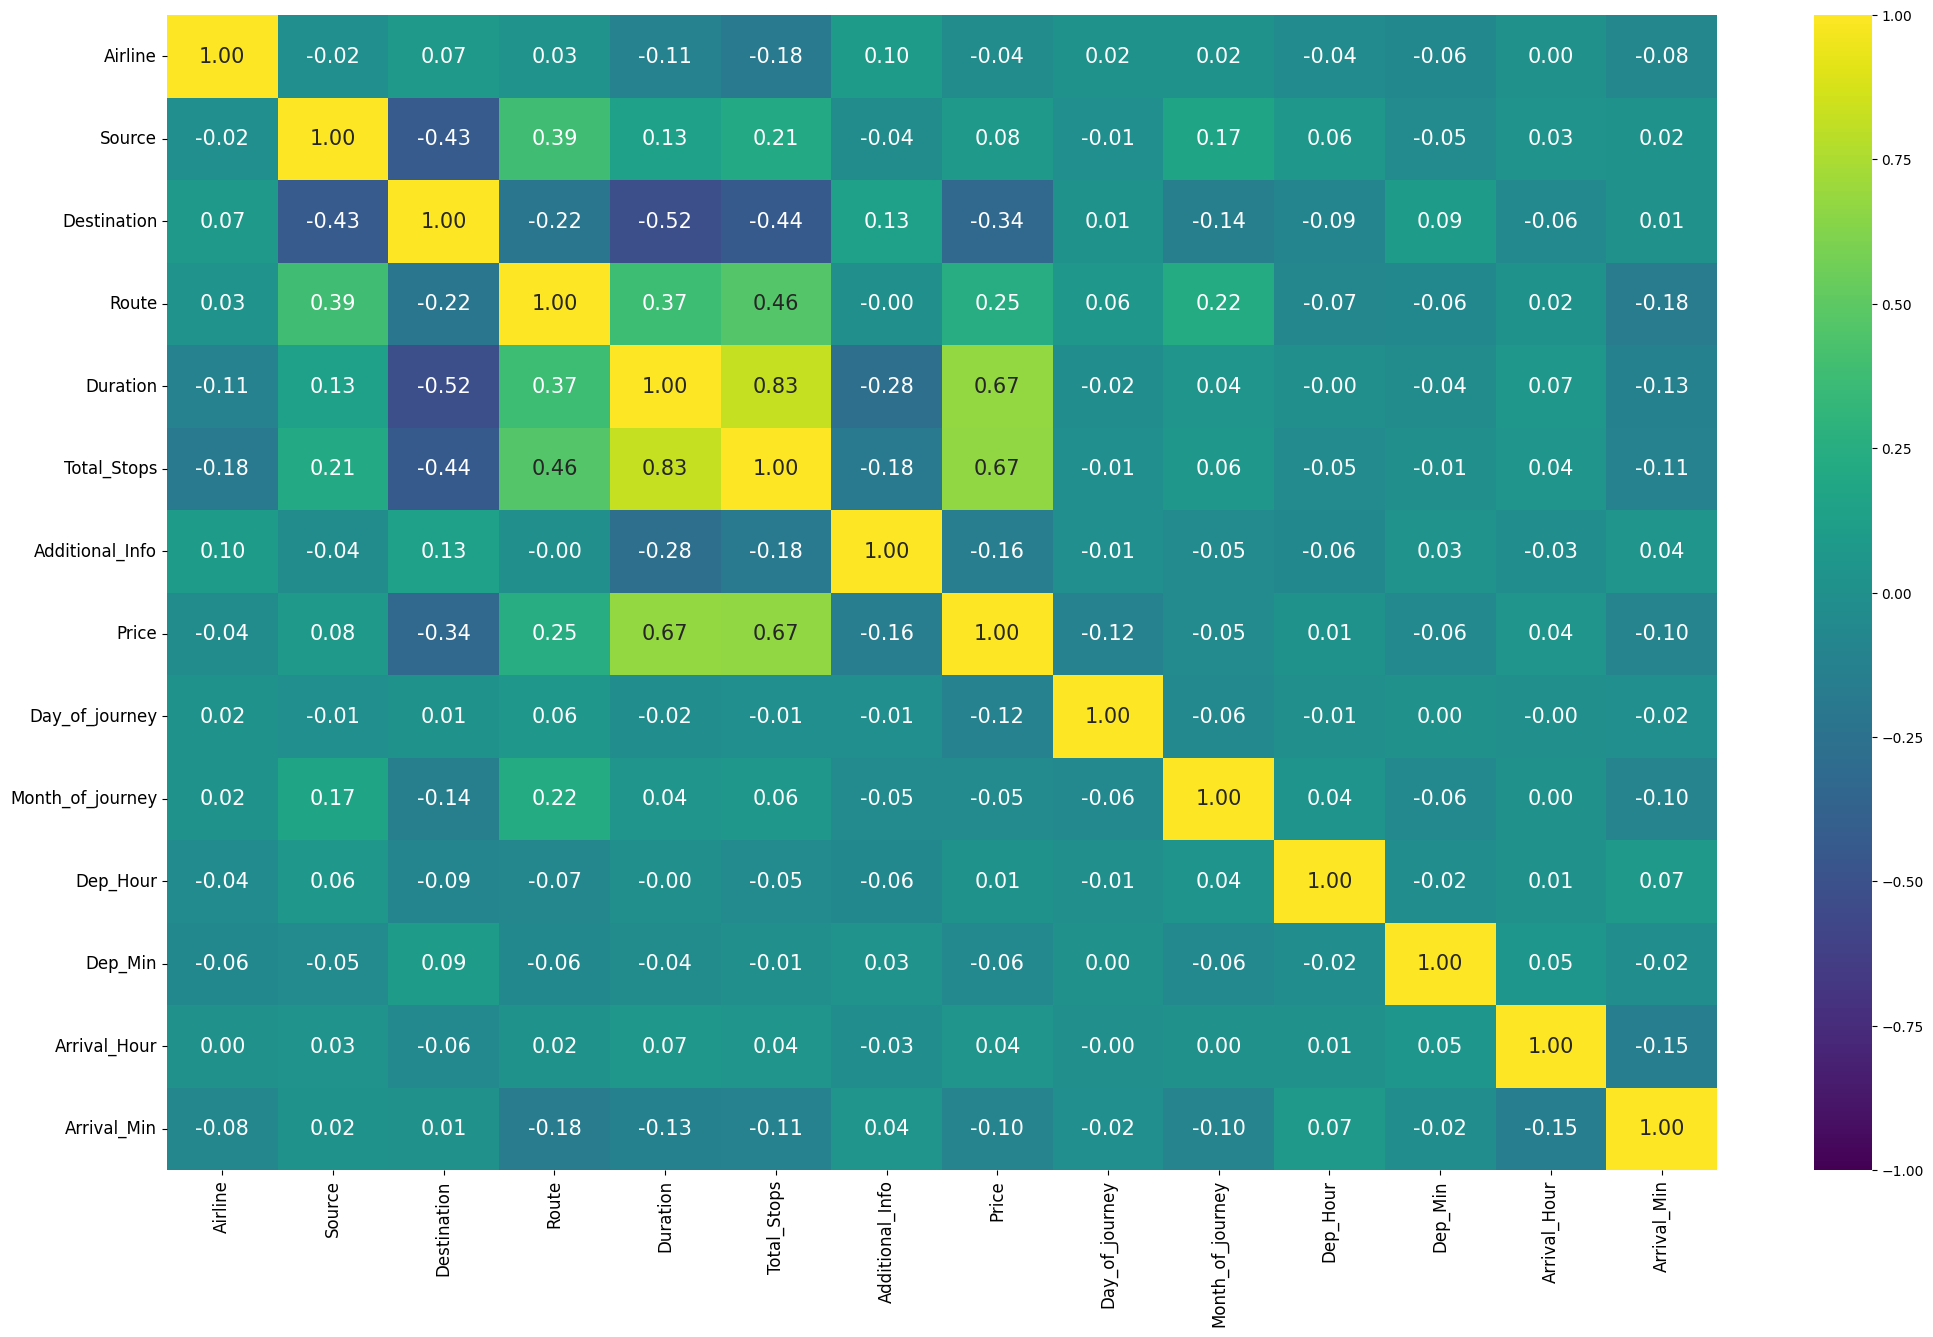

In [109]:
plt.figure(figsize=(25,15))
sns.heatmap(correlation,vmin=-1, vmax=1, annot=True, fmt='0.2f',annot_kws={'size':15}, cmap="viridis")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Observations
<li>Total stops and duration are correlated with Target varible with correlation coeffient of 0.6 & more.</li>

<li>Maximum correlation in dataset exist between Duration & total stops</li>

<h3>Standard Scaling</h3>

In [110]:
# Splitting data in target and dependent feature
X = data.drop(['Price'], axis =1)
Y = data['Price']

In [111]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)

<h3>PCA</h3>

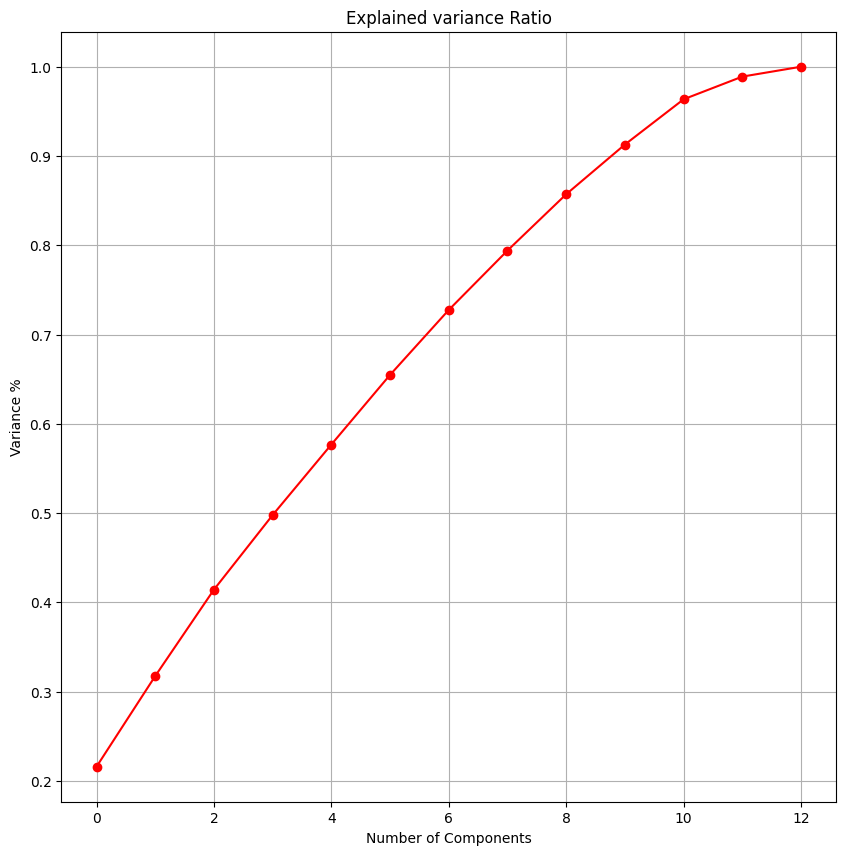

In [112]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

<li>AS per the graph, we can see that 9 principal components attribute for 90% of variation in the data. We shall pick the first 9 components for our prediction.</li>

In [113]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X)

In [114]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

## Model Building

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.30)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7179, 13)
(7179,)
(3077, 13)
(3077,)


In [117]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)

In [118]:
# Evaluating the model
print(' Error of Linear Regression :')
print('Train R² Score:',r2_score(Y_train,y_pred_train))
print('Test R² Score:',r2_score(Y_test,y_pred_test))
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_test))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_test)))

R² Score: 0.5282
Mean absolute error : 2171.0000
Mean Squared Error: 7538341.9679
Root Mean Squared Error: 2745.6041


<h4>Cross Validation</h4>

In [119]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, Y, cv =3)
print('Cross Validation Score :',lin_reg)
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression()
Mean CV Score : 0.5234402380423312


<h4>Applying Different Models</h4>

In [120]:
RFR = RandomForestRegressor()
DTC = DecisionTreeRegressor()
BR = BaggingRegressor()
XT = ExtraTreesRegressor()
ADB=AdaBoostRegressor()
GRB=GradientBoostingRegressor()
XGBR=XGBRegressor()
model = [RFR,DTC,BR,XT,ADB,GRB,XGBR]

In [121]:
for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred_train = m.predict(X_train)
    y_pred_test = m.predict(X_test)

    print(' Error of ', m, ':')
    print('Train R² Score:',r2_score(Y_train,y_pred_train))
    print('Test R² Score:',r2_score(Y_test,y_pred_test))
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_test))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred_test))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_test)))
    print('==============================================================================================================')


 Error of  RandomForestRegressor() :
Train R² Score: 0.9853130587292781
Test R² Score: 0.9191230190343286
Mean absolute error : 596.9389818314065
Mean squared error : 1292145.0763852675
Root Mean Squared Error: 1136.725594145424
 Error of  DecisionTreeRegressor() :
Train R² Score: 0.9949449568919134
Test R² Score: 0.8747605168608695
Mean absolute error : 646.0821687791139
Mean squared error : 2000910.266123208
Root Mean Squared Error: 1414.5353534370245
 Error of  BaggingRegressor() :
Train R² Score: 0.9809003895191858
Test R² Score: 0.9151591632575152
Mean absolute error : 616.7754498816101
Mean squared error : 1355474.3038657631
Root Mean Squared Error: 1164.2483858119638
 Error of  ExtraTreesRegressor() :
Train R² Score: 0.9949449568919134
Test R² Score: 0.924073334042159
Mean absolute error : 548.7234503304084
Mean squared error : 1213055.5123640902
Root Mean Squared Error: 1101.3879935627092
 Error of  AdaBoostRegressor() :
Train R² Score: 0.6215355191248186
Test R² Score: 0.60386

In [122]:
model = [RFR,DTC,BR,XT,ADB,GRB,XGBR]
for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('Cross Validation Score :',m)
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor()
Mean CV Score : 0.9230789398828501


Cross Validation Score : DecisionTreeRegressor()
Mean CV Score : 0.8672773649757918


Cross Validation Score : BaggingRegressor()
Mean CV Score : 0.917499827312


Cross Validation Score : ExtraTreesRegressor()
Mean CV Score : 0.9247884400119082


Cross Validation Score : AdaBoostRegressor()
Mean CV Score : 0.6148293468310677


Cross Validation Score : GradientBoostingRegressor()
Mean CV Score : 0.8435624851798522


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_oneh

<h4>XGB regressor gives maximum R2 Score of 0.9298 with crossvalidation score 0.9335. </h4>

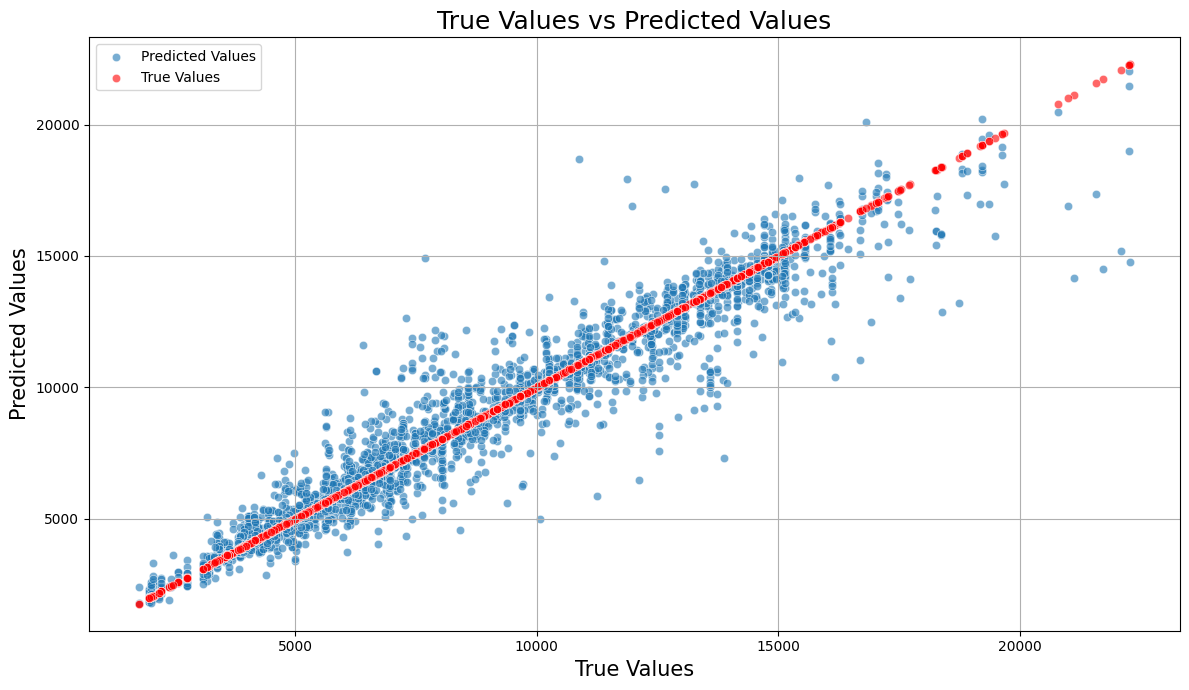

In [123]:
plt.figure(figsize=(12,7))
y_pred=XGBR.predict(X_test)
# Scatter plot
plt.scatter(Y_test, y_pred, alpha=0.6, edgecolors='w', linewidth=0.5, label='Predicted Values')
plt.scatter(Y_test, Y_test, alpha=0.6, edgecolors='w', linewidth=0.5, label='True Values', color='red')
plt.title('True Values vs Predicted Values', fontsize=18)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Saving 

In [124]:
import joblib
joblib.dump(XGBR,'Flight_Price_Final.pkl')

['Flight_Price_Final.pkl']

## Prediction According Final Regression Model

In [125]:
# Loading the saved model
Model = joblib.load("Flight_Price_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

,Actual Values,Predicted Values
0,6824,7825.773438
1,8907,8370.099609
2,7229,7330.003906
3,8366,8081.737793
4,2017,1967.648682
...,...,...
3072,5443,5578.484863
3073,4491,4446.890137
3074,12723,12585.946289
3075,7503,7166.933105


## Appying ML Model on Test Dataset

In [126]:
test_df = pd.read_excel("Test_set.xlsx")

In [127]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [128]:
test_df.shape

(2671, 10)

## Same Feature Engineering as Train data

In [129]:
test_df['Date_of_Journey'] = pd.to_datetime(test_df['Date_of_Journey'] , dayfirst=True)

test_df['Day_of_journey'] = test_df['Date_of_Journey'].dt.day
test_df['Month_of_journey'] = test_df['Date_of_Journey'].dt.month


test_df = test_df.drop(['Date_of_Journey'],axis=1)

In [130]:
# Conversion of Duration column from hr & Minutes format to Minutes
test_df['Duration']=test_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# convert this column into a numeric datatypes
test_df['Duration']=pd.to_numeric(test_df['Duration'])

In [131]:
test_df['Dep_Time'] = pd.to_datetime(test_df['Dep_Time'], format='%H:%M')

# Extracting Hours from Dep_Time column
test_df['Dep_Hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
test_df['Dep_Min']=pd.to_datetime(test_df['Dep_Time']).dt.minute

# Dropping Dep_Time column
test_df = test_df.drop("Dep_Time",axis=1)

In [132]:
#Extracting the time part from Arrival_time column
test_df['Time_Part'] = test_df['Arrival_Time'].apply(lambda x: x.split(' ')[0])


test_df['Time_Part'] = pd.to_datetime(test_df['Time_Part'], format='%H:%M')

# Extracting Hours from Arrival_Time column
test_df['Arrival_Hour']=pd.to_datetime(test_df['Time_Part']).dt.hour

# Extracting Minutes from Arrival_Time column
test_df['Arrival_Min']=pd.to_datetime(test_df['Time_Part']).dt.minute

# Dropping Arrival_Time column
test_df = test_df.drop(["Arrival_Time",'Time_Part'],axis=1)



In [133]:
# Replacing "New Delhi" as "Delhi" in Destination column
test_df["Destination"] = test_df["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_df["Additional_Info"] = test_df["Additional_Info"].replace("No info","No Info")

In [134]:
stop_mapping = { '1 stop' : 1 , 'non-stop' : 0 , '2 stops' : 2 , '3 stops' : 3 , '4 stops' : 4}
test_df['Total_Stops'] = test_df['Total_Stops'].map(stop_mapping)

In [135]:
test_df.duplicated().sum()

26

In [136]:
test_df = test_df.drop_duplicates()

In [137]:
test_df.shape

(2645, 13)

In [138]:
test_df.isna().sum()

Airline             0
Source              0
Destination         0
Route               0
Duration            0
Total_Stops         0
Additional_Info     0
Day_of_journey      0
Month_of_journey    0
Dep_Hour            0
Dep_Min             0
Arrival_Hour        0
Arrival_Min         0
dtype: int64

In [139]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    test_df[i] = le.fit_transform(test_df[i])
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,655,1,4,6,6,17,30,4,25
1,3,3,0,65,240,1,4,12,5,6,20,10,20
2,4,2,1,76,1425,1,3,21,5,19,15,19,0
3,6,2,1,76,780,1,4,21,5,8,0,21,0
4,0,0,2,16,170,0,4,24,6,23,55,2,45


## Standard Scaling

In [140]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
test_df = scaler.fit_transform(test_df)

## Prediction on Test Dataset Using Final Model

In [141]:
# Loading the saved model
Model = joblib.load("Flight_Price_Final.pkl")

In [142]:
# Predicting the flight price from the features of the testing data
Predicted_Price_test = Model.predict(test_df)
Predicted_Price_test

# Creating dataframe for Test data prediction
Prediction = pd.DataFrame()
Prediction['Price'] = Predicted_Price_test
Prediction

,Price
0,11049.189453
1,4770.407715
2,12557.667969
3,9563.026367
4,4412.450195
...,...
2640,6809.318848
2641,5673.807617
2642,7030.517090
2643,9522.593750


## Converting this dataframe into CSV file

In [143]:
# Saving the Predictions
Prediction.to_csv("Submission_Flight_Price_Data.csv",index=False)